In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import seaborn as sn
%matplotlib inline

In [2]:
car_df=pd.read_csv('auto-mpg.csv')
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
car_df.shape


(398, 9)

In [4]:
car_df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
car_df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
#car_df['acceleration'].isnull().sum()
car_df['horsepower'].isnull().sum()


0

In [8]:
car_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
car_df['horsepower'].isnull().sum()

0

In [10]:
car_df['horsepower']=car_df['horsepower'].replace('?',np.nan)

In [11]:
car_df['horsepower'].isnull().sum()

6

In [12]:
car_df['horsepower'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

In [13]:
car_df['horsepower']=car_df['horsepower'].astype('float64')
#print(cad_df)

In [14]:
print(car_df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

In [15]:
car_df['horsepower']=car_df['horsepower'].fillna(car_df['horsepower'].median())

In [16]:
car_df['horsepower'].isnull().sum()

0

In [17]:
corr_table=car_df.corr()
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


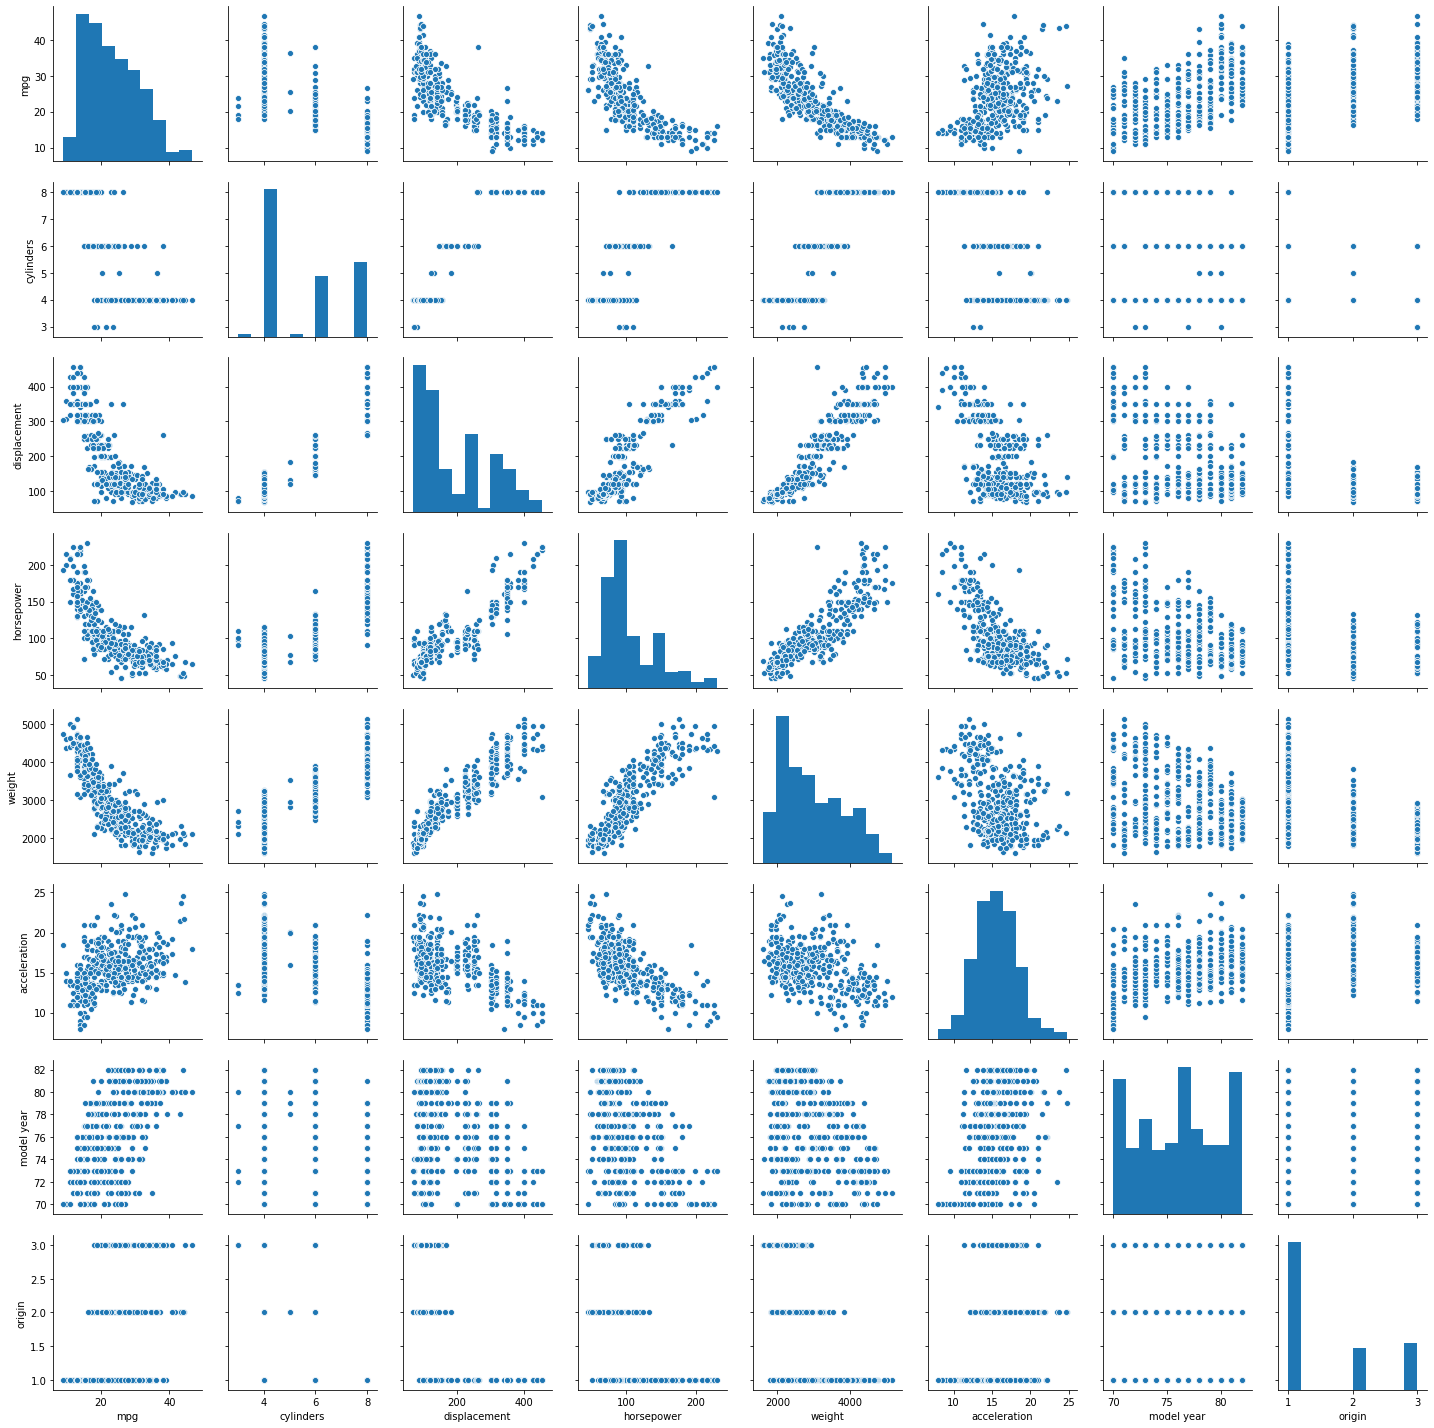

In [18]:
sn.pairplot(car_df)

[Text(0.5, 1, 'Correlation matrix of the car-mpg dataset')]

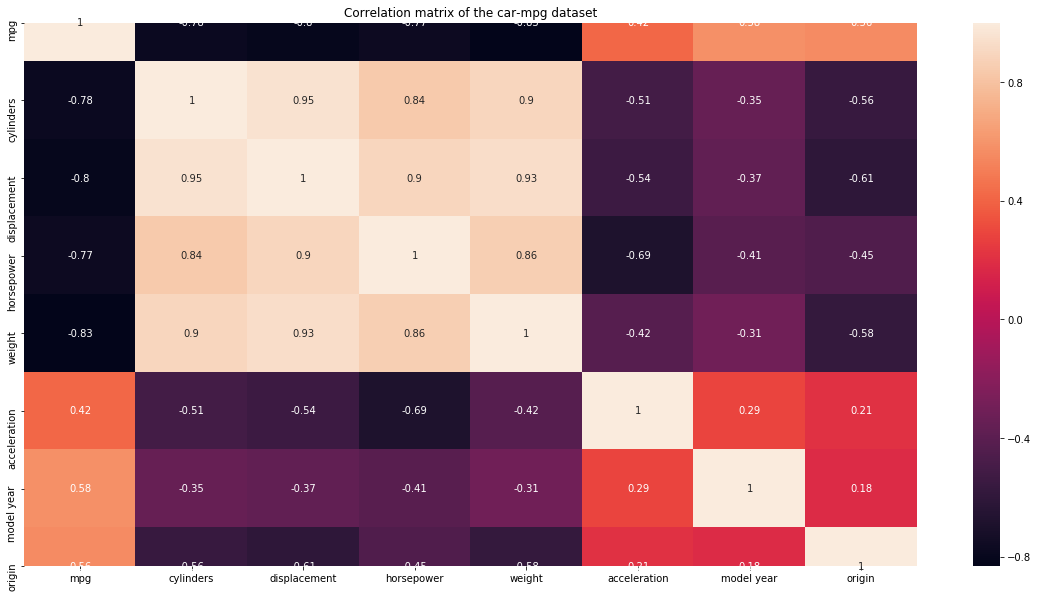

In [19]:
plt.figure(figsize=(20,10))
g=sns.heatmap(corr_table,annot=True)
g.set(title='Correlation matrix of the car-mpg dataset')


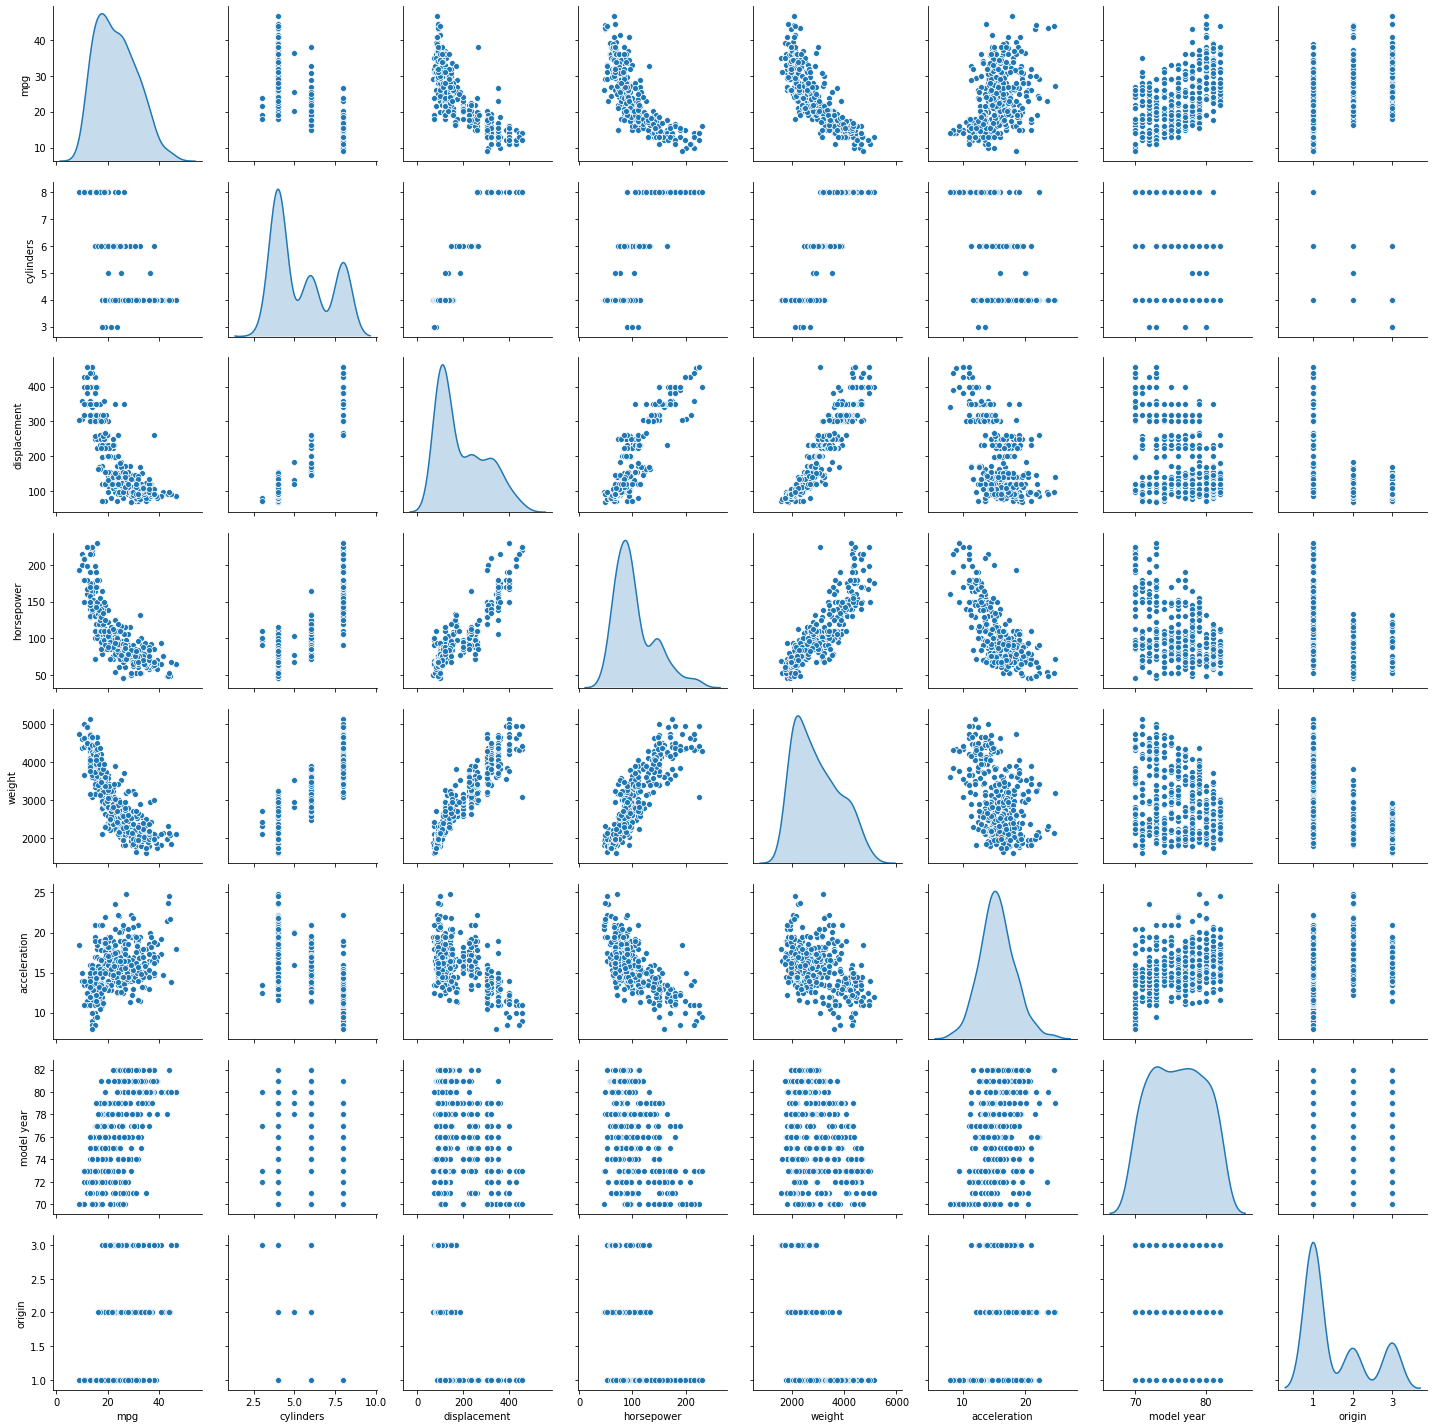

In [20]:
sns.pairplot(car_df,diag_kind='kde')
plt.show()

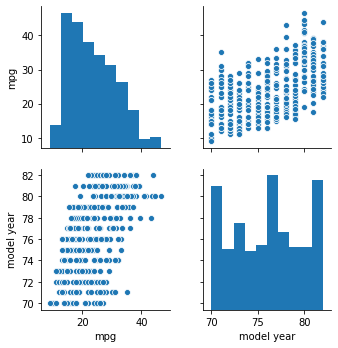

In [21]:
sns.pairplot(car_df,vars=['mpg','model year'])

In [22]:
car_df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [23]:
import statsmodels.formula.api as smf

In [24]:
test1=smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+origin',car_df).fit()

In [25]:
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sat, 09 May 2020   Prob (F-statistic):          3.03e-104
Time:                        10:32:30   Log-Likelihood:                -1130.6
No. Observations:                 398   AIC:                             2275.
Df Residuals:                     391   BIC:                             2303.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.9725      2.699     15.920      0.000      37.666      48.279
cylinders       -0.5325      0.403     -1.320      0.188      -1.326       0.261
displacement     0.0113      0.009      1.201      0.230      -0.007       0.030
horsepower      -0.0563      0.016     -3.421      0.001      -0.089      -0.024
weight          -0.0050      0.001     -6.337      0.000      -0.007      -0.003
acceleration    -0.0118      0.121     -0.097      0.922      -0.250       0.227
origin           1.4539      0.346      4.206      0.000       0.774       2.133
==============================================================================
Omnibus:                       32.446   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.885
Skew:                           0.623   Prob(JB):                     4.87e-10
Kurtosis:                       4.018   Cond. No.                     4.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
car_df=car_df.drop('acceleration',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin,car name
0,18.0,8,307.0,130.0,3504,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,70,1,ford torino


In [27]:
car_df=car_df.drop('car name',axis=1)
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504,70,1
1,15.0,8,350.0,165.0,3693,70,1
2,18.0,8,318.0,150.0,3436,70,1
3,16.0,8,304.0,150.0,3433,70,1
4,17.0,8,302.0,140.0,3449,70,1


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
from sklearn.model_selection import KFold
from sklearn import metrics

In [30]:
y=car_df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [39]:
x=car_df.iloc[:,1:]
x.head()

,cylinders,displacement,horsepower,weight,model year,origin
0,8,307.0,130.0,3504,70,1
1,8,350.0,165.0,3693,70,1
2,8,318.0,150.0,3436,70,1
3,8,304.0,150.0,3433,70,1
4,8,302.0,140.0,3449,70,1


In [40]:
kf=KFold(n_splits=5,shuffle=True,random_state=2)
rmse=[]
for train,test in kf.split(x,y):
    LR=LinearRegression()
    #print(train)
    xtrain=x.iloc[train]
    xtest=x.iloc[test]
    ytrain=y.iloc[train]
    ytest=y.iloc[test]
    LR.fit(xtrain,ytrain)
    ypredict=LR.predict(xtest)
   
    rmse.append(np.sqrt(metrics.mean_squared_error(ytest,ypredict)))

    
    
print('Rmse error in the first test is :%1.3f'%(rmse[0]))
print('Rmse error in the second test is:%1.3f'%(rmse[1]))
print('Rmse error in the third test is :%1.3f'%(rmse[2]))
print('Rmse error in the fourth test is:%1.3f'%(rmse[3]))
print('Rmse error in the fifth test is :%1.3f'%(rmse[4]))

print('Average mean rmse error i.e Bias error is: %1.3f'%(np.mean(rmse)))
print('Variance of rmse error i.e Variance error is: %1.3f'%(np.var(rmse,ddof=1)))
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4,random_state=101)
# from sklearn.linear_model import LinearRegression
# lm=LinearRegression()
# lm.fit(X_train,Y_train)

Rmse error in the first test is :2.771
Rmse error in the second test is:3.577
Rmse error in the third test is :3.657
Rmse error in the fourth test is:3.461
Rmse error in the fifth test is :3.343
Average mean rmse error i.e Bias error is: 3.362
Variance of rmse error i.e Variance error is: 0.123


In [33]:
# cylinder=8,displacement=206,horsepower=200,weight=1900,modelyear=70,origin=2
values=[[8,206,200,1900,70,2]]
new_mileage=LR.predict(values)
print('predicted new mileage for above values is %1.3f'%new_mileage)

predicted new mileage for above values is 23.630


In [34]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.4,random_state=101)
 from sklearn.linear_model import LinearRegression
 lm=LinearRegression()
 lm.fit(X_train,Y_train)
 print(X_test)
print(Y_test)

     cylinders  displacement  horsepower  weight  model year  origin
130          4         122.0        80.0    2451          74       1
202          6         258.0        95.0    3193          76       1
322          4          86.0        65.0    2110          80       3
104          8         400.0       167.0    4906          73       1
91           8         400.0       150.0    4464          73       1
..         ...           ...         ...     ...         ...     ...
209          4         120.0        88.0    3270          76       2
315          4         151.0        90.0    3003          80       1
365          6         200.0        88.0    3060          81       1
194          6         232.0        90.0    3085          76       1
296          4         121.0        80.0    2670          79       1

[160 rows x 6 columns]
130    26.0
202    17.5
322    46.6
104    12.0
91     13.0
       ... 
209    19.0
315    24.3
365    20.2
194    22.5
296    27.4
Name: mpg, Lengt

In [35]:
print(X_test)

     cylinders  displacement  horsepower  weight  model year  origin
130          4         122.0        80.0    2451          74       1
202          6         258.0        95.0    3193          76       1
322          4          86.0        65.0    2110          80       3
104          8         400.0       167.0    4906          73       1
91           8         400.0       150.0    4464          73       1
..         ...           ...         ...     ...         ...     ...
209          4         120.0        88.0    3270          76       2
315          4         151.0        90.0    3003          80       1
365          6         200.0        88.0    3060          81       1
194          6         232.0        90.0    3085          76       1
296          4         121.0        80.0    2670          79       1

[160 rows x 6 columns]


In [36]:
lm.intercept_
#x.columns

-15.968989976539067

In [37]:
lm.coef_

array([-0.62898044,  0.02592176, -0.02618396, -0.00659617,  0.76355795,
        1.43551987])

In [38]:
values=[[8,206,200,1900,70,2]]
pridect=lm.predict(values)
print(pridect)
#plt.scatter(X_test,pridect)

[22.88963101]
